<a href="https://colab.research.google.com/github/VladSkopenko/DataScienceNotebooks/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble


In [1]:

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [12]:
from sklearn.ensemble import (
AdaBoostClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

ada = AdaBoostClassifier(n_estimators=100).fit(X, y)
gbc = GradientBoostingClassifier().fit(X, y)
rfc = RandomForestClassifier().fit(X, y)

ada.score(X,y), gbc.score(X,y), rfc.score(X, y)

(0.9733333333333334, 1.0, 1.0)

In [16]:
bc = BaggingClassifier(LogisticRegression()).fit(X, y)
vc = VotingClassifier([("svc", SVC()), ("lr", LogisticRegression())]).fit(X,y)
sc = StackingClassifier([("svc", SVC()), ("lr", LogisticRegression())]).fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [15]:
bc.score(X, y), vc.score(X, y), sc.score(X, y)

(0.9733333333333334, 0.9733333333333334, 0.9733333333333334)

In [17]:
bc.estimators_

[LogisticRegression(random_state=2142104669),
 LogisticRegression(random_state=577923556),
 LogisticRegression(random_state=1531647818),
 LogisticRegression(random_state=1744143809),
 LogisticRegression(random_state=457396817),
 LogisticRegression(random_state=268977332),
 LogisticRegression(random_state=787135342),
 LogisticRegression(random_state=937262077),
 LogisticRegression(random_state=542740560),
 LogisticRegression(random_state=33271722)]

In [18]:
sc.estimators_

[SVC(), LogisticRegression()]

In [19]:
vc.estimators_

[SVC(), LogisticRegression()]

In [23]:
from xgboost import XGBRFClassifier, XGBClassifier
xrf = XGBRFClassifier().fit(X,y)
xs = XGBClassifier().fit(X, y)


In [24]:
xrf.score(X, y),  xs.score(X, y)


(0.9733333333333334, 1.0)

In [26]:
xs.get_xgb_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

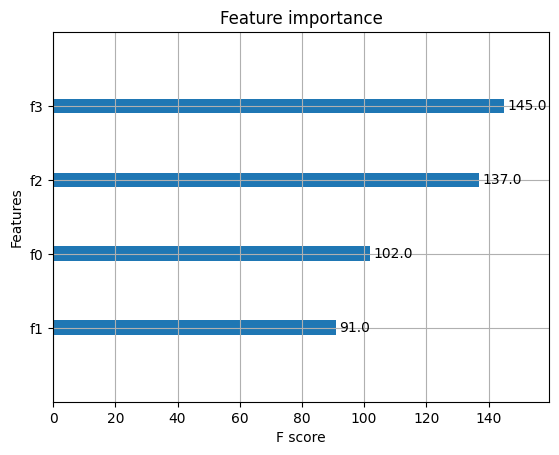

In [28]:
from xgboost import plot_importance
plot_importance(xs)

<Axes: >

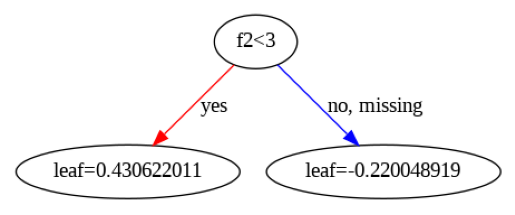

In [30]:
import xgboost

xgboost.plot_tree(xs)

<Axes: >

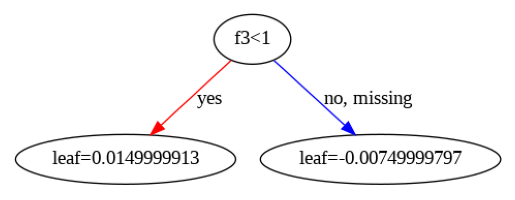

In [31]:
import xgboost

xgboost.plot_tree(xrf)